# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** RAFI HAKIIM SYAH
- **Email:** brandnewpearl1996@gmail.com
- **ID Dicoding:** pearl_hakiim_CP54

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :Bagaimana Trend Rental Sepeda dalam beberapa tahun terakhir?
- Pertanyaan 2 :Bagaimana Pola Rental Sepeda menurut Musim?
- Pertanyaan 3 :Bagaimana Pola Rental Sepeda menurut Kondisi Cuaca?
- Pertanyaan 4 :Bagaimana Pola Rental Sepeda menurut hari?
- Pertanyaan 5 :Bagaimana Pola Rental Sepeda menurut jam?


## Import Semua Packages/Library yang Digunakan

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio
pio.renderers.default = "notebook_connected"

## Data Wrangling

### Gathering Data

In [166]:
day_df=pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [167]:
hour_df=pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [168]:
#01 ASSESSING DAY_DF
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#Informasi yang didapatkan pada dataset day_df
#1) Terlihat bahwa variabel dteday pada dy_df bukan bertipe datetime
#2) Terlihat bahwa variabel season, yr, mnth, holiday, weekday, workingday, weather bukan bertipe category

In [169]:
#Day_df.01 Mencari Keberadaan Missing Values pada data day_df
#Berdasarkan informasi day_df.info() diketahui tidak ada missing values pada setiap variabel di day_df
#Untuk memastikan ada tidaknya missing value pada day_df bisa menggunakan method berikut
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#Disimpulkan tidak ada missing value pada day_df

In [170]:
#Day_df.02 Mencari Duplicated Values pada data day_df
day_df.duplicated().sum()

np.int64(0)

#Disimpulkan tidak ada duplicated values pada day_df

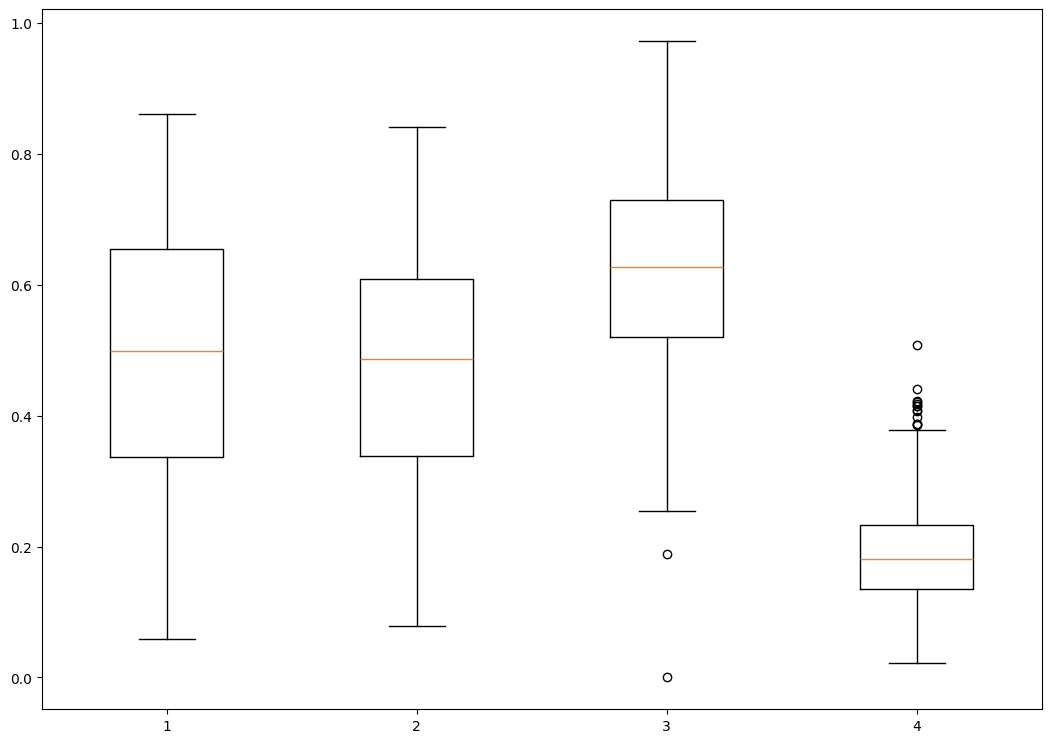

In [171]:
#Day_df.03 Mencari Outlier Values pada data day_df
data = [day_df["temp"],day_df["atemp"],day_df["hum"],day_df["windspeed"]]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

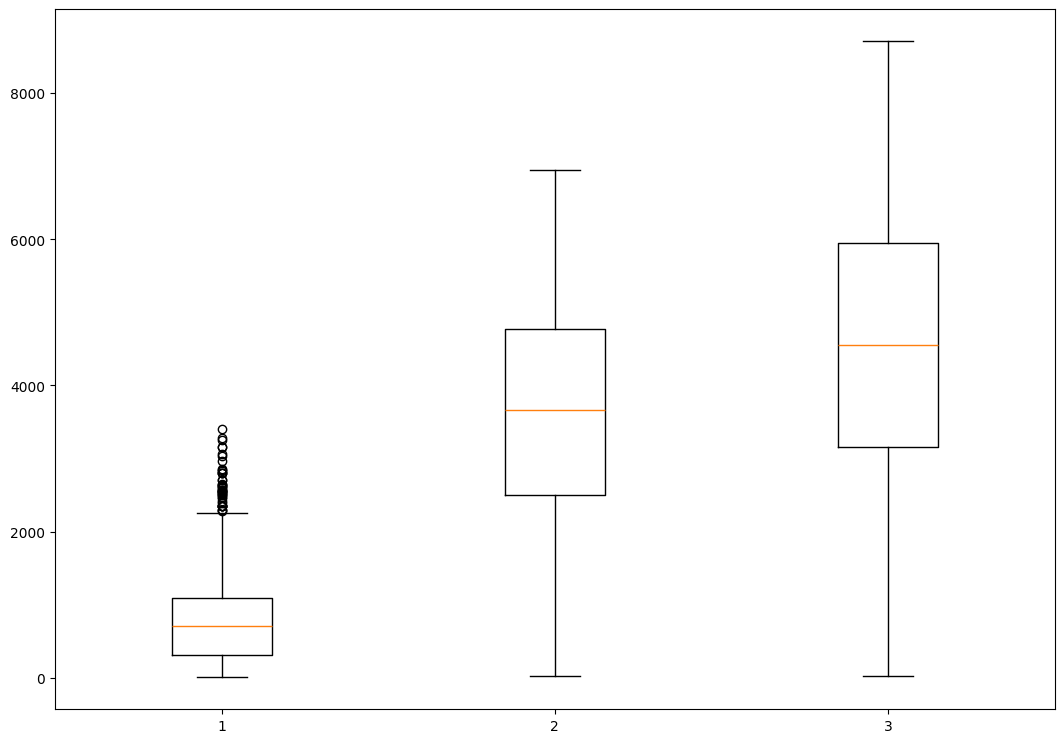

In [172]:
data=[day_df["casual"],day_df["registered"],day_df["cnt"]]
fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

In [173]:
#Disimpulkan terdapat outliers pada variabel windspeed dan casual

In [174]:
#02 ASSESSING HOUR_DF:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#1) Terlihat bahwa variabel dteday pada dy_df bukan bertipe datetime
#2) Terlihat bahwa variabel season, yr, mnth, hr, holiday, weekday, workingday, weather bukan bertipe category

In [175]:
#hour_df.01 Mencari Keberadaan Missing Values pada data hour_df
#Berdasarkan informasi hour_df.info() diketahui tidak ada missing values pada setiap variabel di hour_df
#Untuk memastikan ada tidaknya missing value pada hour_df bisa menggunakan method berikut
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#Disimpulkan tidak ada missing value pada hour_df

In [176]:
#hour_df.02 Mencari Duplicated Values pada data hour_df
hour_df.duplicated().sum()

np.int64(0)

#Disimpulkan tidak ada duplicated values pada hour_df

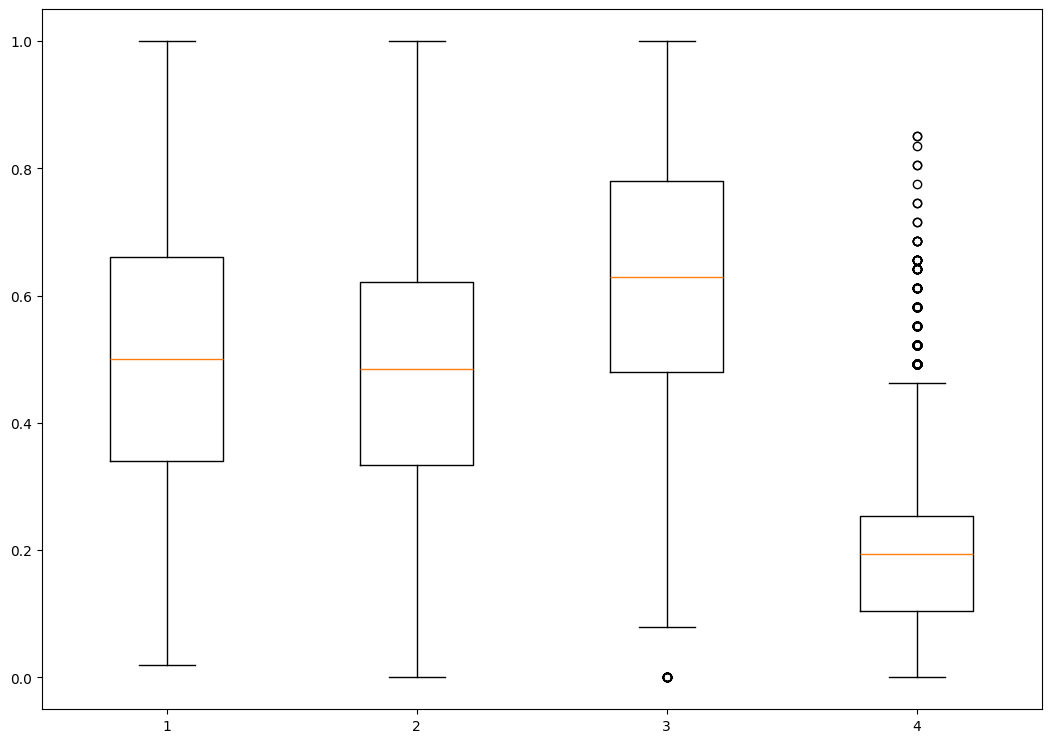

In [177]:
#hour_df.03 Mencari Outlier Values pada data hour_df
data = [hour_df["temp"],hour_df["atemp"],hour_df["hum"],hour_df["windspeed"]]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

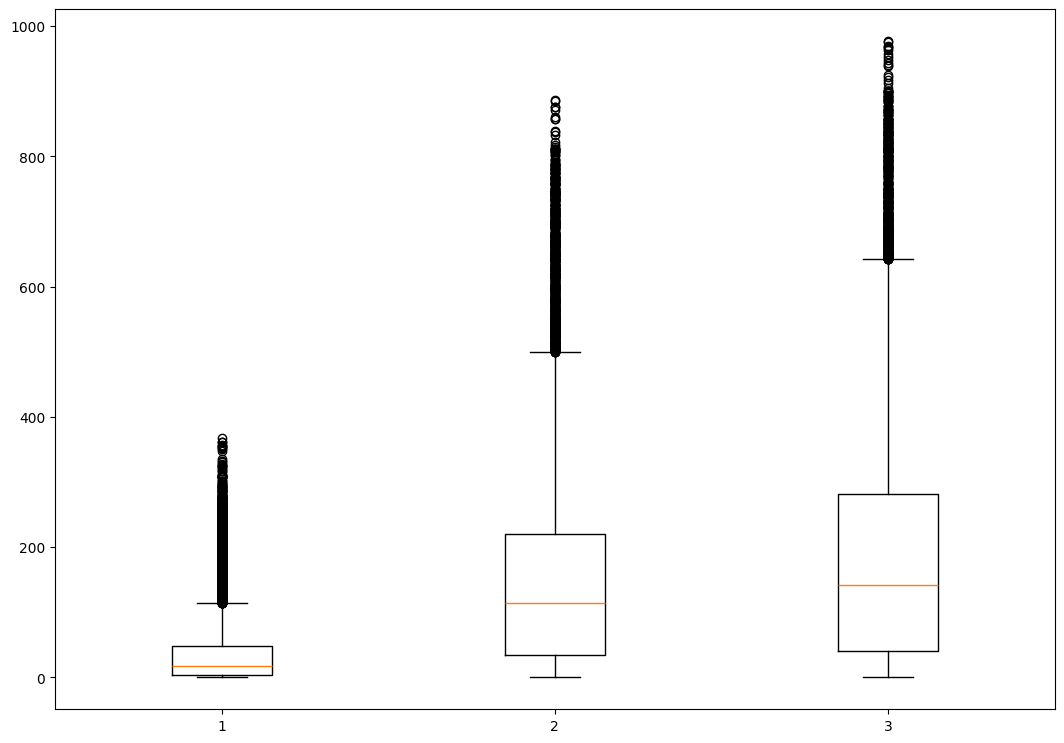

In [178]:
data=[hour_df["casual"],hour_df["registered"],hour_df["cnt"]]
fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

#berdasarkan boxplot outlier ditemukan pada variabel windspeed, casual, registered dan cnt

### Cleaning Data

In [179]:
#Variabel dteday perlu diubah menjadi variabel yang bertipe datetime
#Variabel season,yr, mnth, holiday, weekday, workingday, weathersit perlu diubah menjadi variabel yang bertipe category
day_df['dteday']=pd.to_datetime(day_df['dteday'])
str_columns = ["season", "yr", "mnth","holiday","weekday","workingday","weathersit"]
for column in str_columns:
  day_df[column] = day_df[column].astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [180]:
day_df['season'] = day_df['season'].map({
    1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['yr']=day_df['yr'].map({
    0:'2011',
    1:'2012'
})

day_df['holiday']=day_df['holiday'].map({
    1:'Holiday',
    0:'Not Holiday'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

day_df['weathersit']=day_df['weathersit'].map({
    1:'Clear/Few clouds/Partly cloudy',
    2:'Misty/Cloudy',
    3:'Light Rain/Light Snow',
    4:'Heavy rain/Snow'
})

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,Not Holiday,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,Not Holiday,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,Not Holiday,Mon,1,Clear/Few clouds/Partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,Not Holiday,Tue,1,Clear/Few clouds/Partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,Not Holiday,Wed,1,Clear/Few clouds/Partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [181]:
#Variabel dteday perlu diubah menjadi variabel yang bertipe datetime
#Variabel season,yr, mnth, hr, holiday, weekday, workingday, weathersit perlu diubah menjadi variabel yang bertipe category
hour_df['dteday']=pd.to_datetime(hour_df['dteday'])
str_columns_hour = ["season", "yr", "mnth","hr","holiday","weekday","workingday","weathersit"]
for column in str_columns_hour:
  hour_df[column] = hour_df[column].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [182]:
hour_df['season'] = hour_df['season'].map({
    1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

hour_df['yr']=hour_df['yr'].map({
    0:'2011',
    1:'2012'
})

hour_df['holiday']=hour_df['holiday'].map({
    1:'Holiday',
    0:'Not Holiday'
})

hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

hour_df['weathersit']=hour_df['weathersit'].map({
    1:'Clear/Few clouds/Partly cloudy',
    2:'Misty/Cloudy',
    3:'Light Rain/Light Snow',
    4:'Heavy rain/Snow'
})

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Not Holiday,Sat,0,Clear/Few clouds/Partly cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Not Holiday,Sat,0,Clear/Few clouds/Partly cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Not Holiday,Sat,0,Clear/Few clouds/Partly cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Not Holiday,Sat,0,Clear/Few clouds/Partly cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Not Holiday,Sat,0,Clear/Few clouds/Partly cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [183]:
day_df.to_csv('day_df_final.csv')

In [184]:
hour_df.to_csv('hour_df_final.csv')

## Exploratory Data Analysis (EDA)

### Explore ...

In [185]:
#1 EDA pada day_df
day_df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [186]:
day_df.groupby(by='season').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum"})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\2981063028.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,casual,registered,cnt
season,,,
Springer,60622,410726,471348
Summer,203522,715067,918589
Fall,226091,835038,1061129
Winter,129782,711831,841613


In [187]:
day_df.groupby(by='yr').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum"})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\3082738568.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [188]:
monthly_rented_df = day_df.resample(rule='M', on='dteday').agg({
     "casual":"sum",
     "registered":"sum",
     "cnt": "sum"
})

monthly_rented_df.index = monthly_rented_df.index.strftime('%Y-%b')
monthly_rented_df = monthly_rented_df.reset_index()
monthly_rented_df.rename(columns={
    "dteday": "Bulan"
    }, inplace=True)
monthly_rented_df


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\3843877194.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Bulan,casual,registered,cnt
0,2011-Jan,3073,35116,38189
1,2011-Feb,6242,41973,48215
2,2011-Mar,12826,51219,64045
3,2011-Apr,22346,72524,94870
4,2011-May,31050,104771,135821
5,2011-Jun,30612,112900,143512
6,2011-Jul,36452,104889,141341
7,2011-Aug,28842,107849,136691
8,2011-Sep,26545,100873,127418
9,2011-Oct,25222,98289,123511


In [189]:
day_df.groupby(by='holiday').agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum",
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\4219592721.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,casual,registered,cnt
holiday,,,
Not Holiday,597658,2616586,3214244
Holiday,22359,56076,78435


In [190]:
day_df.info()
day_df.groupby(by='weekday').agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum"
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\2590172564.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,casual,registered,cnt
weekday,,,
Sun,140521,303506,444027
Mon,70784,384719,455503
Tue,57843,411266,469109
Wed,57319,415729,473048
Thu,61460,423935,485395
Fri,78238,409552,487790
Sat,153852,323955,477807


In [191]:
day_df.groupby(by='workingday').agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum"
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\2660997583.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


In [192]:
day_df.groupby(by='weathersit').agg({
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum",
    "temp":"mean",
    "atemp":"mean",
    "hum":"mean",
    "windspeed":"mean"
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\1221389059.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,casual,registered,cnt,temp,atemp,hum,windspeed
weathersit,,,,,,,
Clear/Few clouds/Partly cloudy,446346,1811606,2257952,0.511541,0.488596,0.565594,0.190253
Misty/Cloudy,169776,827082,996858,0.470366,0.452868,0.725887,0.186431
Light Rain/Light Snow,3895,33974,37869,0.433440,0.413064,0.848872,0.243336


In [193]:
#2 EDA pada hour_df
hour_df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [194]:
hour_df.groupby(by='hr').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum",
    "temp":"mean",
    "atemp":"mean",
    "hum":"mean",
    "windspeed":"mean"
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\2470109074.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,casual,registered,cnt,temp,atemp,hum,windspeed
hr,,,,,,,
0,7375,31755,39130,0.467410,0.451105,0.691019,0.161758
1,4709,19455,24164,0.459365,0.443289,0.704213,0.158659
2,3412,12940,16352,0.454573,0.439184,0.716825,0.154519
3,1893,6281,8174,0.453113,0.438396,0.729785,0.150929
4,874,3554,4428,0.446628,0.432549,0.742367,0.155813
5,1012,13249,14261,0.436123,0.423145,0.742929,0.150342
6,3017,52115,55132,0.432469,0.419376,0.744179,0.157722
7,8037,146134,154171,0.439092,0.425557,0.730908,0.163916
8,15761,245240,261001,0.454993,0.440272,0.702682,0.176563


In [195]:
hour_df.groupby(by=['season','hr']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum",
    "temp":"mean",
    "atemp":"mean",
    "hum":"mean",
    "windspeed":"mean"
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\1733641977.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



casual  registered    cnt      temp     atemp       hum  \
season   hr                                                            
Springer 0      604        4274   4878  0.280674  0.283027  0.622416   
         1      416        2813   3229  0.274719  0.276725  0.635955   
         2      305        1870   2175  0.270941  0.274689  0.639176   
         3      166         942   1108  0.270513  0.276029  0.654231   
         4       73         417    490  0.261558  0.266138  0.666039   
...             ...         ...    ...       ...       ...       ...   
Winter   19    5187       47388  52575  0.441130  0.431599  0.631695   
         20    3964       33585  37549  0.428927  0.420641  0.653842   
         21    3256       25299  28555  0.418305  0.411995  0.681469   
         22    2702       19169  21871  0.410621  0.404376  0.696780   
         23    1931       13369  15300  0.401582  0.397015  0.722203   

             windspeed  
season   hr             
Springer 0    0.196131  
         1    0.193615  
         2    0.188768  
         3    0.180064  
         4    0.188996  
...                ...  
Winter   19   0.172786  
         20   0.169581  
         21   0.157941  
         22   0.154150  
         23   0.150107  

[96 rows x 7 columns]

In [196]:
hour_df.groupby(by=['weekday','hr']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum",
    "temp":"mean",
    "atemp":"mean",
    "hum":"mean",
    "windspeed":"mean"
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\1284139846.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



casual  registered    cnt      temp     atemp       hum  windspeed
weekday hr                                                                    
Sun     0     1896        7879   9775  0.451538  0.435462  0.675385   0.170069
        1     1560        6493   8053  0.442885  0.426871  0.691731   0.171213
        2     1284        5002   6286  0.440000  0.426921  0.699608   0.164921
        3      870        2369   3239  0.431346  0.421476  0.714808   0.152702
        4      258         697    955  0.430784  0.418747  0.728431   0.152332
...            ...         ...    ...       ...       ...       ...        ...
Sat     19    7427       17526  24953  0.505385  0.480037  0.576154   0.201637
        20    5261       13549  18810  0.491538  0.471589  0.598173   0.196327
        21    4152       12072  16224  0.477692  0.459062  0.623077   0.189728
        22    3635       10890  14525  0.468846  0.454256  0.642500   0.174658
        23    2681        9368  12049  0.460385  0.445370  0.658750   0.165480

[168 rows x 7 columns]

In [197]:
hour_df.groupby(by=['weathersit','hr']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum",
    "temp":"mean",
    "atemp":"mean",
    "hum":"mean",
    "windspeed":"mean"
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\1358050177.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



casual  registered    cnt      temp  \
weathersit                     hr                                        
Clear/Few clouds/Partly cloudy 0     5589       23341  28930  0.475624   
                               1     3406       13448  16854  0.466204   
                               2     2394        8513  10907  0.459079   
                               3     1305        4153   5458  0.452967   
                               4      582        2349   2931  0.445252   
...                                   ...         ...    ...       ...   
Heavy rain/Snow                19       0           0      0       NaN   
                               20       0           0      0       NaN   
                               21       0           0      0       NaN   
                               22       0           0      0       NaN   
                               23       0           0      0       NaN   

                                      atemp       hum  windspeed  
weathersit                     hr                                 
Clear/Few clouds/Partly cloudy 0   0.459103  0.657382   0.159759  
                               1   0.450651  0.669980   0.153036  
                               2   0.444373  0.686255   0.146948  
                               3   0.439894  0.699934   0.141485  
                               4   0.432798  0.714179   0.146354  
...                                     ...       ...        ...  
Heavy rain/Snow                19       NaN       NaN        NaN  
                               20       NaN       NaN        NaN  
                               21       NaN       NaN        NaN  
                               22       NaN       NaN        NaN  
                               23       NaN       NaN        NaN  

[96 rows x 7 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Trend Rental Sepeda dalam beberapa tahun terakhir?
> Add blockquote



In [198]:
monthly_rented_df = day_df.resample(rule='M', on='dteday').agg({
     "casual":"sum",
     "registered":"sum",
     "cnt": "sum"
})

monthly_rented_df.index = monthly_rented_df.index.strftime('%Y-%b')
monthly_rented_df = monthly_rented_df.reset_index()
monthly_rented_df.rename(columns={
    "dteday": "Bulan"
    }, inplace=True)
monthly_rented_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\3073278647.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Bulan,casual,registered,cnt
0,2011-Jan,3073,35116,38189
1,2011-Feb,6242,41973,48215
2,2011-Mar,12826,51219,64045
3,2011-Apr,22346,72524,94870
4,2011-May,31050,104771,135821


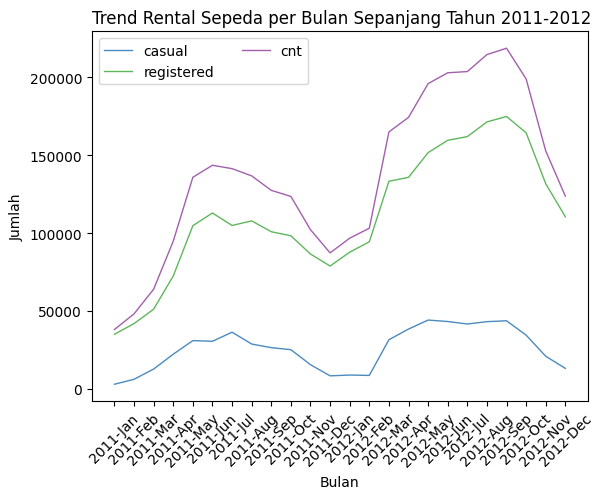

In [199]:
palette = plt.get_cmap('Set1')
num=0
for column in monthly_rented_df.drop('Bulan', axis=1):
    num+=1
    plt.plot(monthly_rented_df['Bulan'], monthly_rented_df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Trend Rental Sepeda per Bulan Sepanjang Tahun 2011-2012", loc='left', fontsize=12, fontweight=0)
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(rotation = 45)

plt.show()

### Pertanyaan 2: Bagaimana Pola Rental Sepeda menurut Musim?

> Add blockquote



C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\2956371638.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



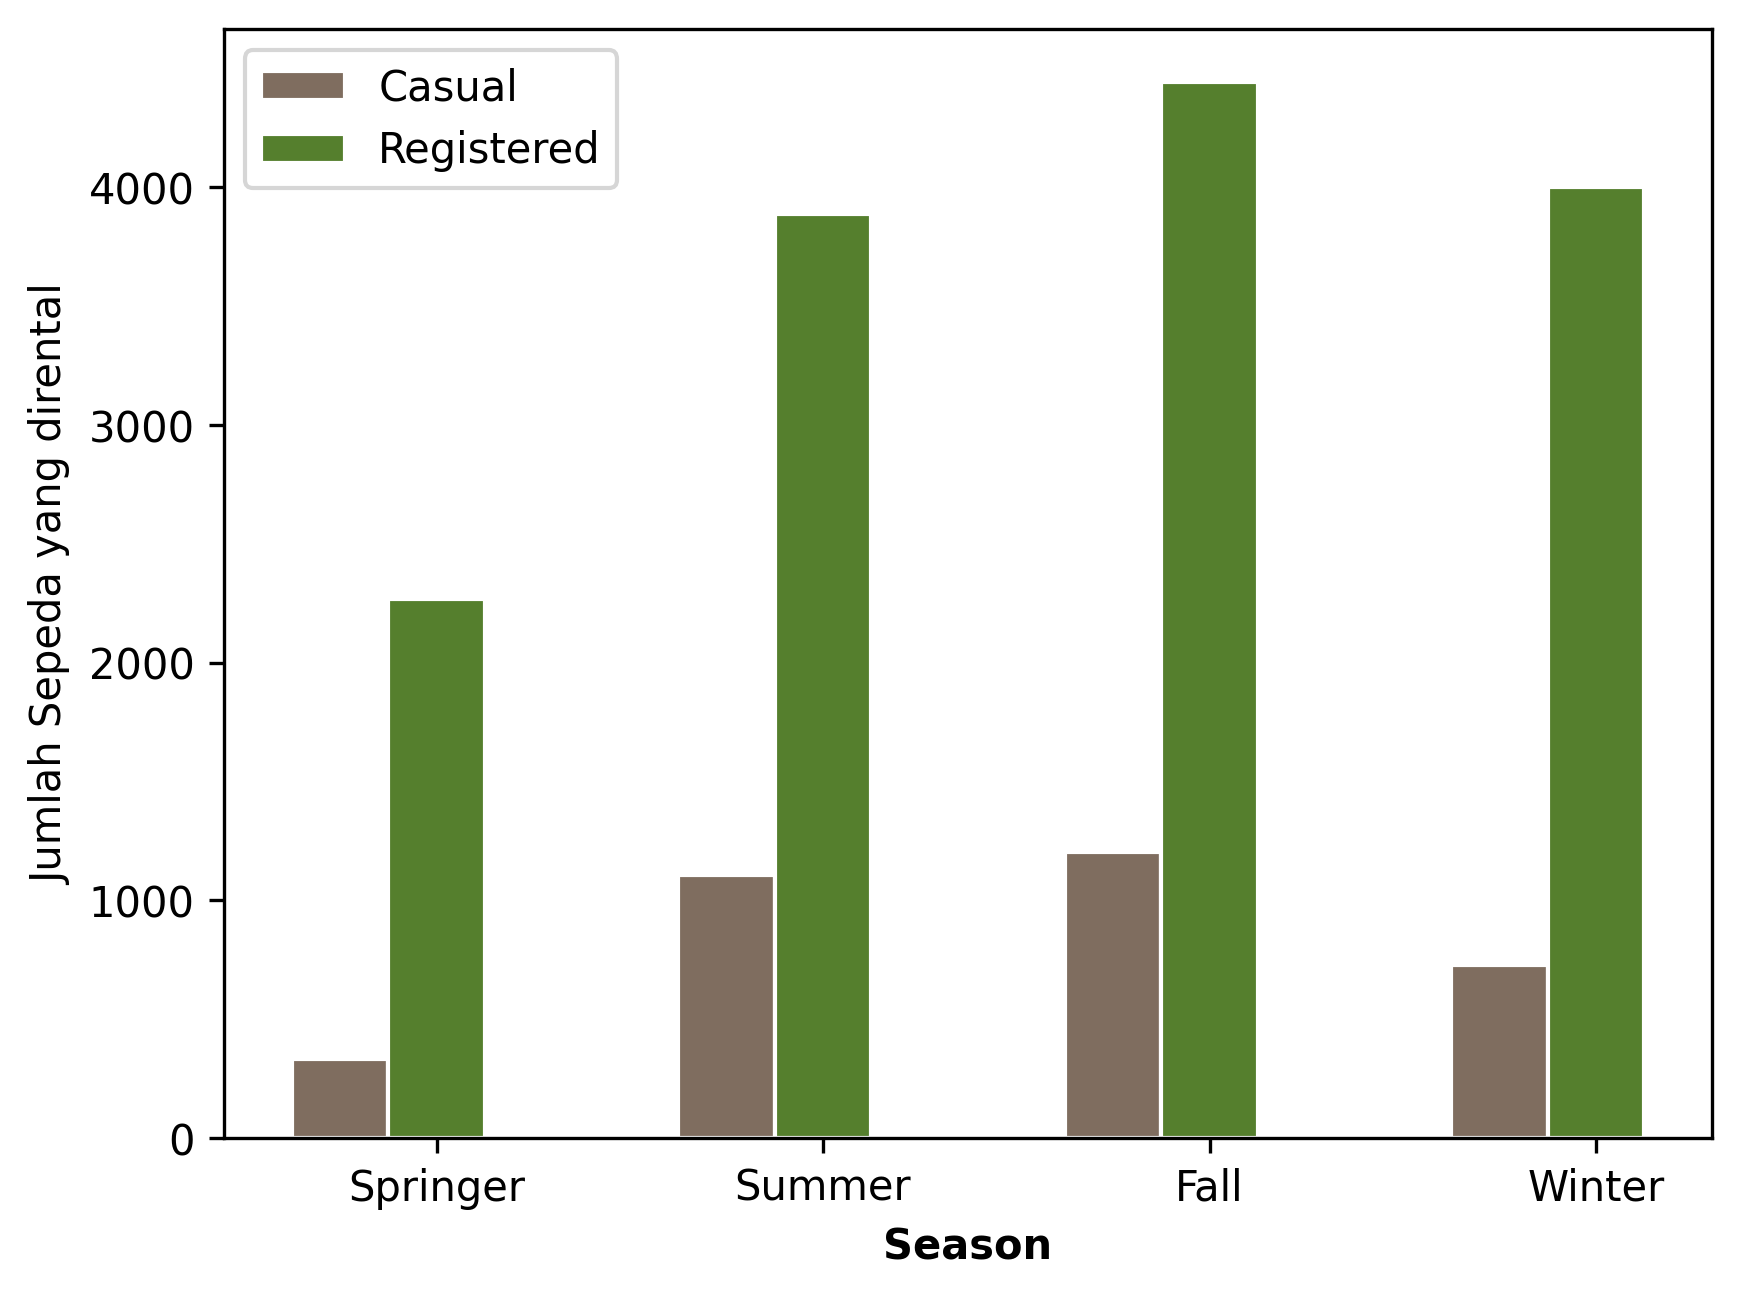

In [200]:
season_rented_df=day_df.groupby(by='season').agg({
    "casual": "mean",
    "registered": "mean",
    "cnt":"mean"})

r = np.arange(len(season_rented_df['casual']))
r2 = r + barWidth

fig, ax = plt.subplots(dpi=300)
ax.bar(r, season_rented_df['casual'], color='#7f6d5f', width=barWidth, edgecolor='white', label='Casual')
ax.bar(r2, season_rented_df['registered'], color='#557f2d', width=barWidth, edgecolor='white', label='Registered')

ax.set_ylabel('Jumlah Sepeda yang dirental')
ax.set_xlabel('Season', fontweight='bold')
ax.set_xticks(r + barWidth)
ax.set_xticklabels(['Springer', 'Summer', 'Fall', 'Winter'])

# Legend and show
ax.legend()
plt.show()


## Pertanyaan 3 Bagaimana Pola Rental Sepeda menurut Kondisi Cuaca?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\3124206708.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

d:\New folder\02 Dasar SQL\03 Dasar Python\main-ds\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.



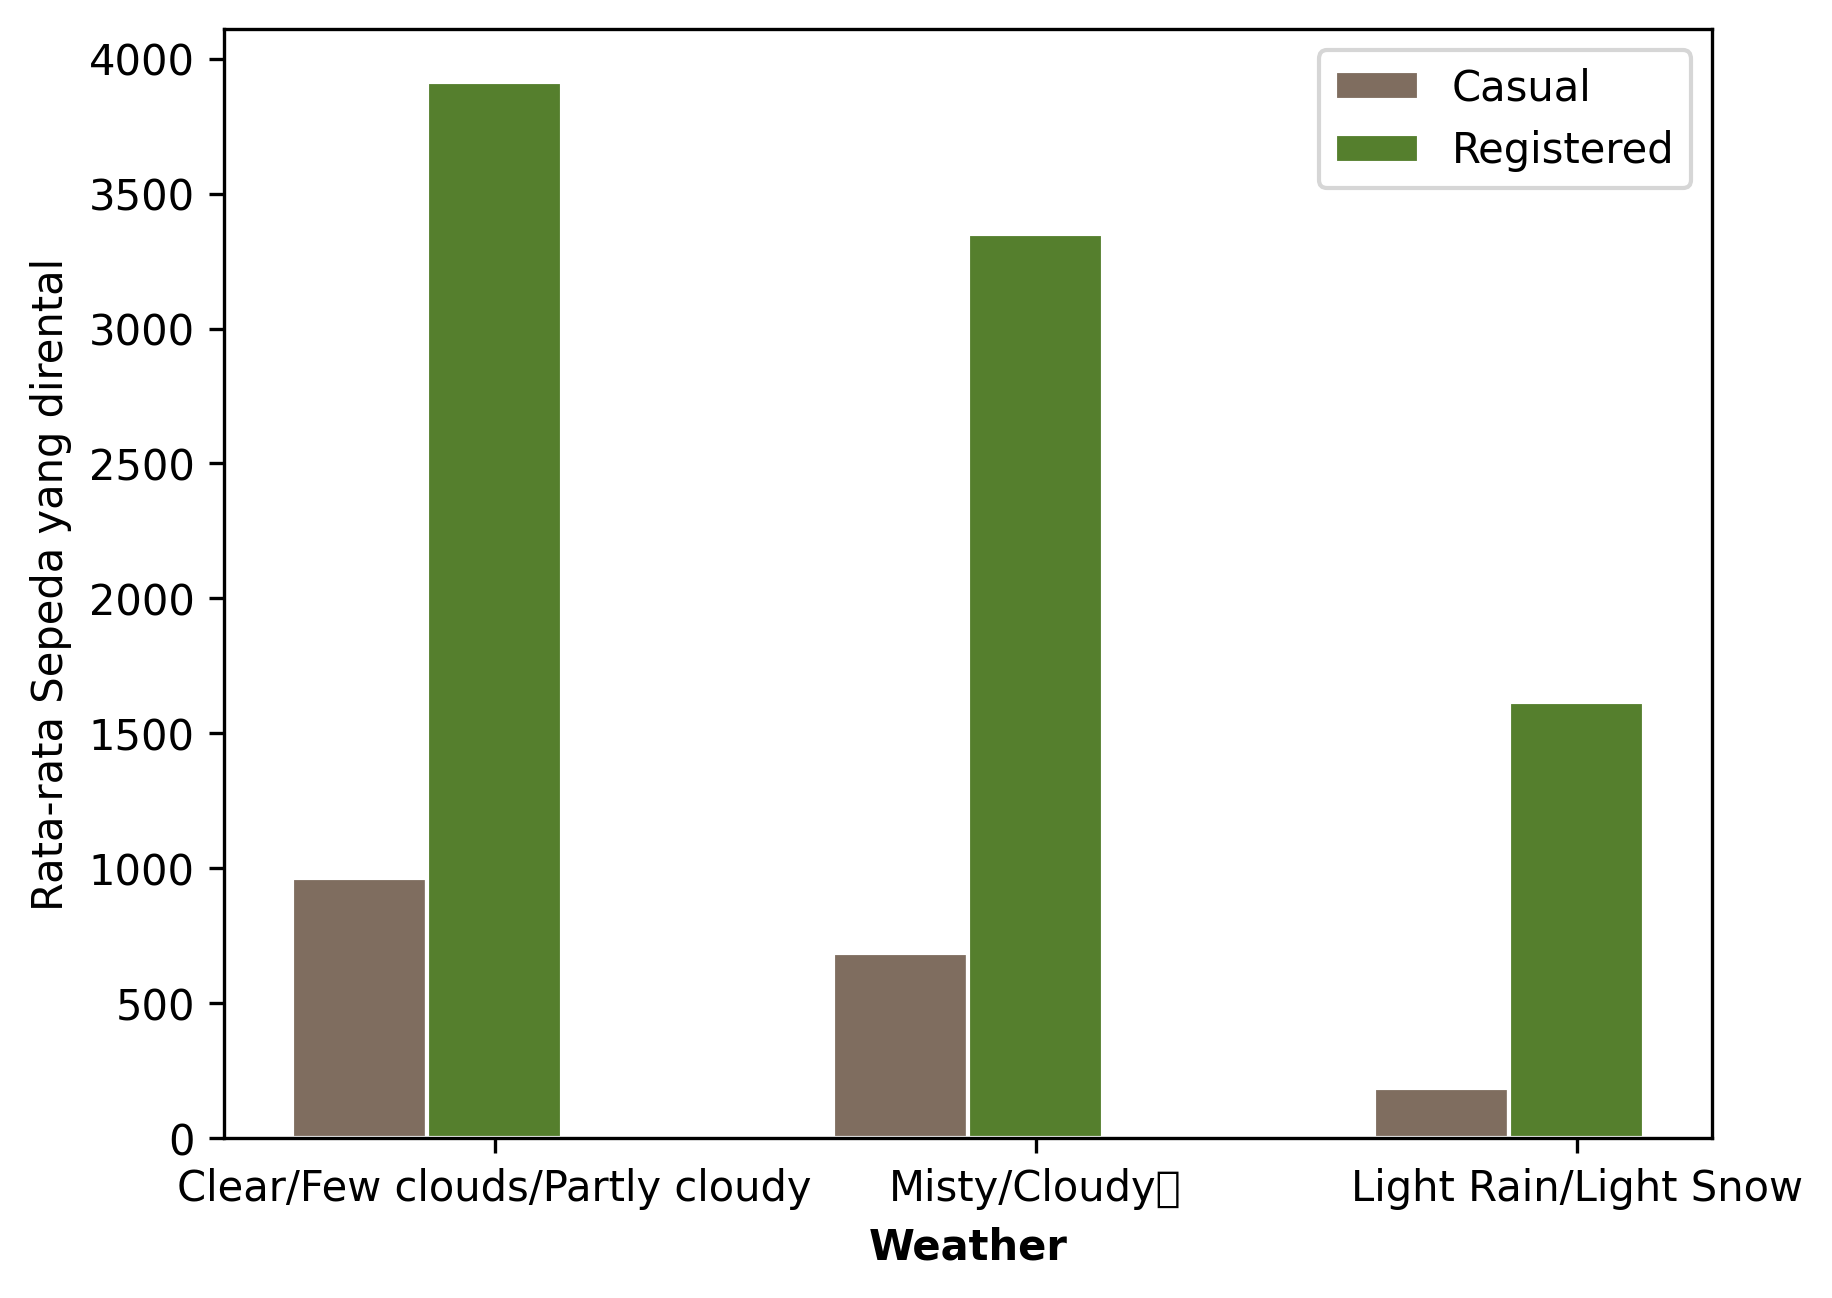

In [201]:
weather_rented_df=day_df.groupby(by='weathersit').agg({
    "casual":"mean",
    "registered":"mean",
    "cnt":"mean",
    "temp":"mean",
    "atemp":"mean",
    "hum":"mean",
    "windspeed":"mean"
})

r = np.arange(len(weather_rented_df['casual']))
r2 = r + barWidth

fig, ax = plt.subplots(dpi=300)
ax.bar(r, weather_rented_df['casual'], color='#7f6d5f', width=barWidth, edgecolor='white', label='Casual')
ax.bar(r2, weather_rented_df['registered'], color='#557f2d', width=barWidth, edgecolor='white', label='Registered')

ax.set_ylabel('Rata-rata Sepeda yang dirental')
ax.set_xlabel('Weather', fontweight='bold')
ax.set_xticks(r + barWidth)
ax.set_xticklabels(['Clear/Few clouds/Partly cloudy', 'Misty/Cloudy	', 'Light Rain/Light Snow'])

# Legend and show
ax.legend()
plt.show()


## Pertanyaan 4: Bagaimana pola peminjaman sepeda menurut hari dalam seminggu?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\1661330196.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



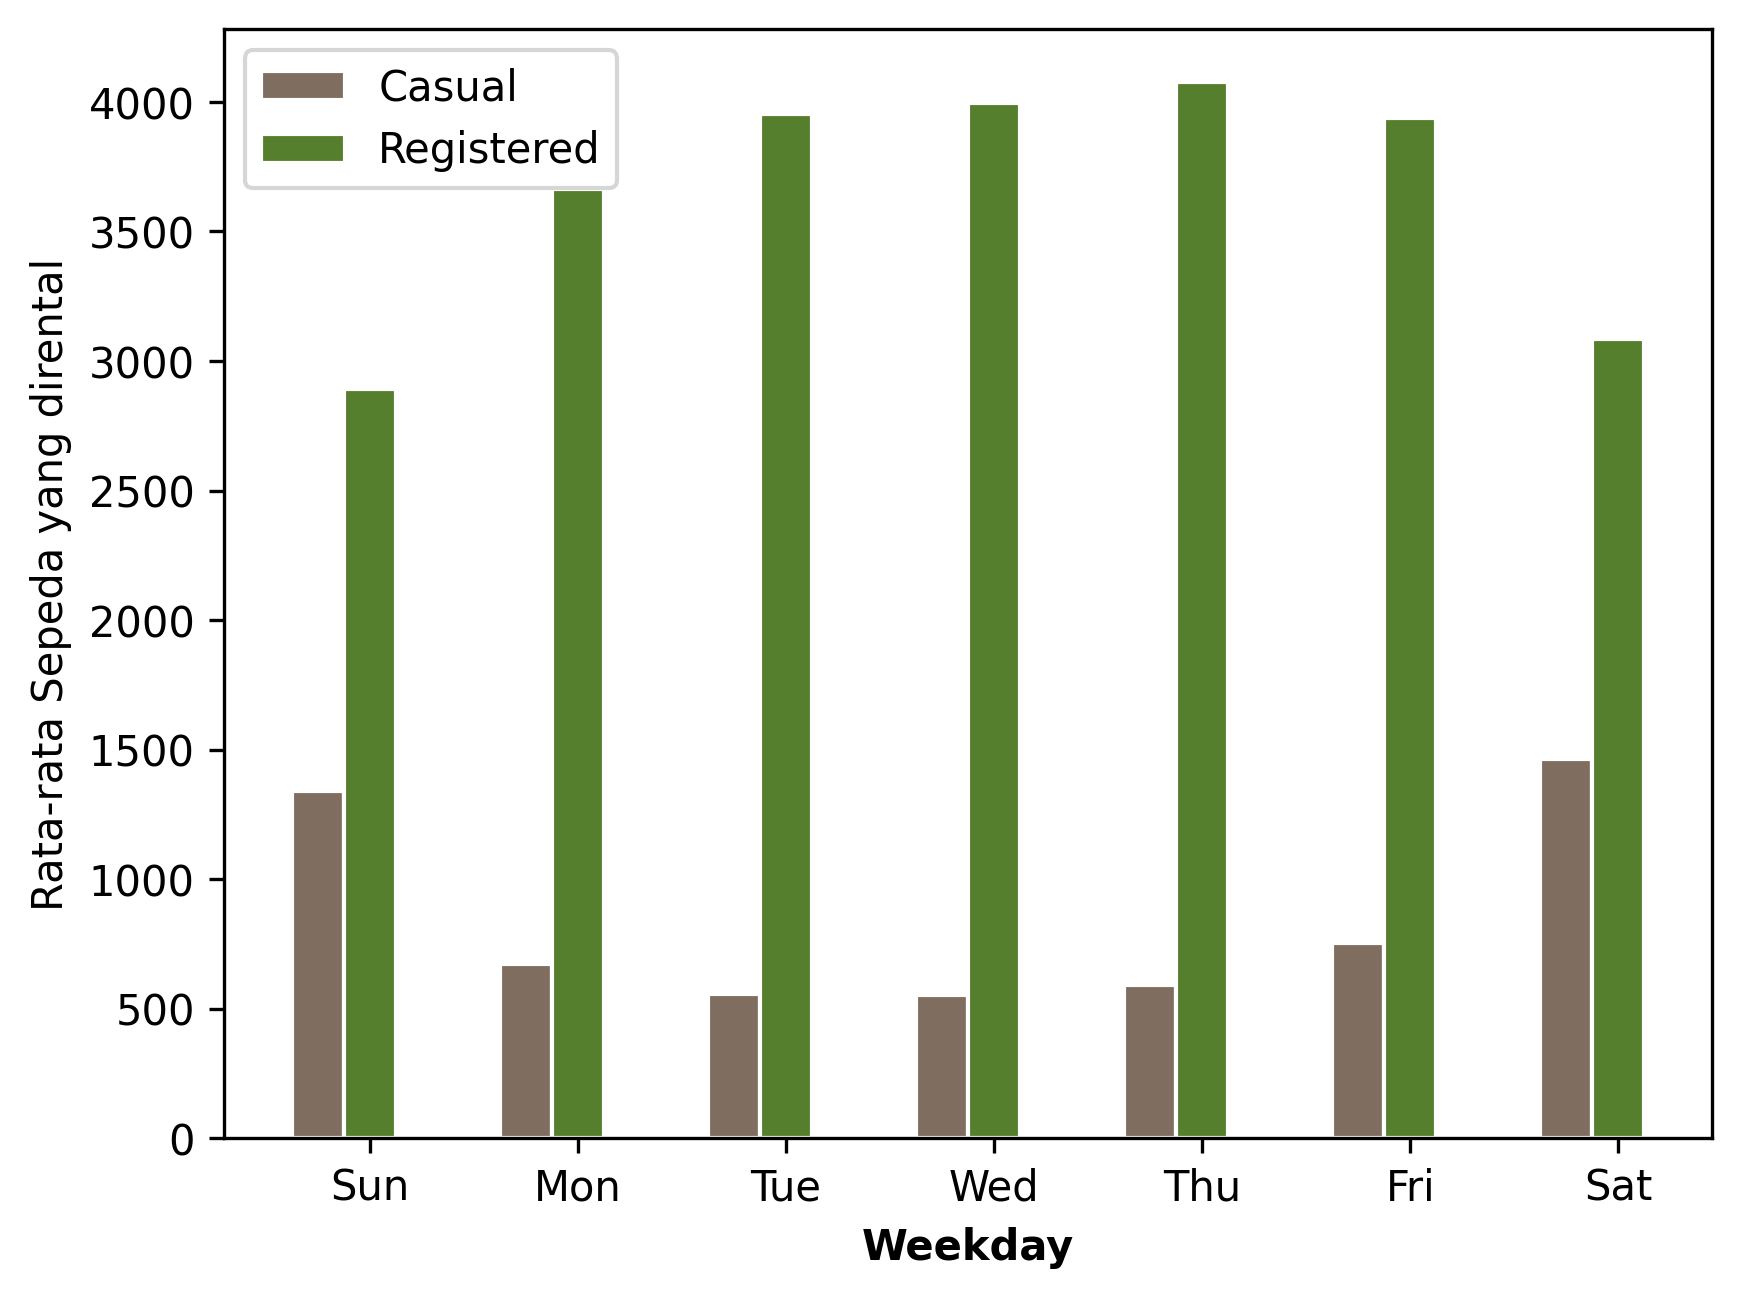

In [202]:
weekday_rented_df=day_df.groupby(by='weekday').agg({
    "casual":"mean",
    "registered":"mean",
    "cnt":"mean"
})

r = np.arange(len(weekday_rented_df['casual']))
r2 = r + barWidth

fig, ax = plt.subplots(dpi=300)
ax.bar(r, weekday_rented_df['casual'], color='#7f6d5f', width=barWidth, edgecolor='white', label='Casual')
ax.bar(r2, weekday_rented_df['registered'], color='#557f2d', width=barWidth, edgecolor='white', label='Registered')

ax.set_ylabel('Rata-rata Sepeda yang dirental')
ax.set_xlabel('Weekday', fontweight='bold')
ax.set_xticks(r + barWidth)
ax.set_xticklabels(['Sun', 'Mon','Tue','Wed','Thu', 'Fri','Sat'])

# Legend and show
ax.legend()
plt.show()


## Pertanyaan 5: Bagaimana Pola rental sepeda menurut jam?

In [203]:
hourly_rented_df=hour_df.groupby(by='hr').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum"
})
hourly_rented_df = hourly_rented_df.reset_index()
hourly_rented_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25180\2970889750.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


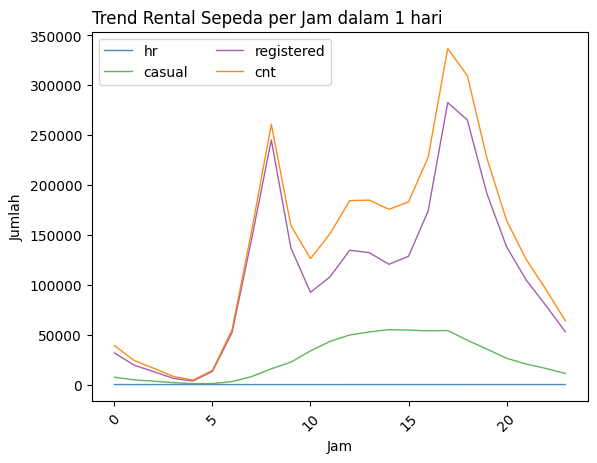

In [204]:
palette = plt.get_cmap('Set1')
num=0
for column in hourly_rented_df[1::].columns:
    num+=1
    plt.plot(hourly_rented_df['hr'], hourly_rented_df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Trend Rental Sepeda per Jam dalam 1 hari", loc='left', fontsize=12, fontweight=0)
plt.xlabel("Jam")
plt.ylabel("Jumlah")
plt.xticks(rotation = 45)

plt.show()

## Conclusion

**- Conclusion pertanyaan 1**
Secara umum tren rental sepeda mengalami peningkatan pada periode 20211-2012.Jika kita lihat lebih lanjut, ada pola kenaikan dan penurunan pada periode bulan-bulan tertentu. Jumlah sepeda yang dirental mengalami kenaikan pada periode Semester 1. Namun memasuki bulan september terjadi penurunan drastis hingga akhir tahun.
Trend peningkatan jumlah sepeda yang dirental ini lebih dapat ditujunkkan oleh Pengguna yang telah terdaftar (Registered). Pola yang cukup mendatar ditunjukkan oleh pengguna Casual pada periode 2011-2012.

**- Conclusion pertanyaan 2** Pola rental sepeda mengalami kenaikan setiap musimnya hingga puncaknya pada musim gugur. Pada musim dingin, terjadi sedikit penurunan dibanding musim gugur dalam penggunaan sepeda rental

**- Conclusion pertanyaan 3** Rental sepeda paling banyak dilakukan saat kondisi cuaca yang cerah/sedikit berawan. Pada saat cuaca hujan deras/bersalju tidak ada penggunaan rental sepeda

**- Conclusion pertanyaan 4** Rata-rata penggunaan sepeda rental menurut hari ditemukan berbeda untuk Registered user dan Casual User. Rata-rata sepeda yang dipinjam oleh Registered user ditemukan lebih rendah pada hari minggu dan sabtu. Sedangkan pada weekday, penggunaan sepeda rental oleh Registered user cenderung lebih tinggi dan mempunyai pola yang relatif sama. Sedangkan casual user lebih banyak meminjam sepeda pada hari minggu dan sabtu dibandingkan dengan weekday

**- Conclusion pertanyaan 5** Rata-rata penggunaan sepeda rental menurut jam ditemukan berbeda untuk Registered user dan Casual User. Peminjaman sepeda oleh registered user mempunyai 2 waktu puncak yakni jam 8 dan jam 17. Sedangkan Rata-rata Casual user menggunakan sepeda mulai dari pukul 8 hingga 17 dan relatif sama pada periode waktu tersebut